# Final Group Project: Health Indicators and Diabetes Risk
## Research Question: What factors are most strongly associated with diabetes diagnosis in the US population?

This analysis examines physical health indicators, lifestyle behaviors, and socioeconomic factors related to diabetes.
"""




## 1. Initial Setup and Data Loading
Import required libraries and load the dataset


In [340]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [342]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100

## 2. Data Loading and Cleaning
Load the dataset and handle duplicates

In [374]:
df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

In [376]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [380]:
print("Initial Dataset Information:")
print("-" * 50)
print("Initial shape:", df.shape)
print(f"Initial number of duplicates: {df.duplicated().sum()}")

Initial Dataset Information:
--------------------------------------------------
Initial shape: (253680, 22)
Initial number of duplicates: 24206


In [382]:
# Check initial class distribution
print("\nInitial Diabetes Distribution (%):")
print(df['Diabetes_binary'].value_counts(normalize=True) * 100)


Initial Diabetes Distribution (%):
Diabetes_binary
0.0    86.066698
1.0    13.933302
Name: proportion, dtype: float64


In [384]:
# Remove duplicates
df_cleaned = df.drop_duplicates()

In [386]:
# Report cleaning results
print("\nCleaning Results:")
print("-" * 50)
print("Shape after removing duplicates:", df_cleaned.shape)
print(f"Number of rows removed: {len(df) - len(df_cleaned)}")
print(f"Percentage of duplicates removed: {((len(df) - len(df_cleaned)) / len(df)) * 100:.2f}%")


Cleaning Results:
--------------------------------------------------
Shape after removing duplicates: (229474, 22)
Number of rows removed: 24206
Percentage of duplicates removed: 9.54%


In [388]:
# Check class distribution after cleaning
print("\nDiabetes Distribution After Cleaning (%):")
print(df_cleaned['Diabetes_binary'].value_counts(normalize=True) * 100)
df = df_cleaned


Diabetes Distribution After Cleaning (%):
Diabetes_binary
0.0    84.705457
1.0    15.294543
Name: proportion, dtype: float64


## 3. Data Description and Initial Analysis
Examine cleaned dataset characteristics

In [391]:
# Display basic information about cleaned dataset
print("\nCleaned Dataset Information:")
print("-" * 50)
print(df.info())



Cleaned Dataset Information:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 229474 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       229474 non-null  float64
 1   HighBP                229474 non-null  float64
 2   HighChol              229474 non-null  float64
 3   CholCheck             229474 non-null  float64
 4   BMI                   229474 non-null  float64
 5   Smoker                229474 non-null  float64
 6   Stroke                229474 non-null  float64
 7   HeartDiseaseorAttack  229474 non-null  float64
 8   PhysActivity          229474 non-null  float64
 9   Fruits                229474 non-null  float64
 10  Veggies               229474 non-null  float64
 11  HvyAlcoholConsump     229474 non-null  float64
 12  AnyHealthcare         229474 non-null  float64
 13  NoDocbcCost           229474

In [393]:
print("\nFirst few rows:")
print(df.head())


First few rows:
   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       

In [395]:
print("\nBasic statistics:")
print(df.describe())


Basic statistics:
       Diabetes_binary         HighBP       HighChol      CholCheck  \
count    229474.000000  229474.000000  229474.000000  229474.000000   
mean          0.152945       0.454343       0.441640       0.959481   
std           0.359936       0.497912       0.496584       0.197173   
min           0.000000       0.000000       0.000000       0.000000   
25%           0.000000       0.000000       0.000000       1.000000   
50%           0.000000       0.000000       0.000000       1.000000   
75%           0.000000       1.000000       1.000000       1.000000   
max           1.000000       1.000000       1.000000       1.000000   

                 BMI        Smoker         Stroke  HeartDiseaseorAttack  \
count  229474.000000  229474.00000  229474.000000         229474.000000   
mean       28.687507       0.46580       0.044816              0.103336   
std         6.789204       0.49883       0.206899              0.304398   
min        12.000000       0.00000       

## 4. Feature Engineering
Create derived features for analysis

In [399]:
# Create derived features
df['BMI_Category'] = pd.cut(df['BMI'], 
                           bins=[0, 18.5, 24.9, 29.9, float('inf')],
                           labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

df['Health_Score'] = (df['PhysActivity'].astype(int) + 
                     df['Fruits'].astype(int) + 
                     df['Veggies'].astype(int) - 
                     df['Smoker'].astype(int) - 
                     df['HvyAlcoholConsump'].astype(int))

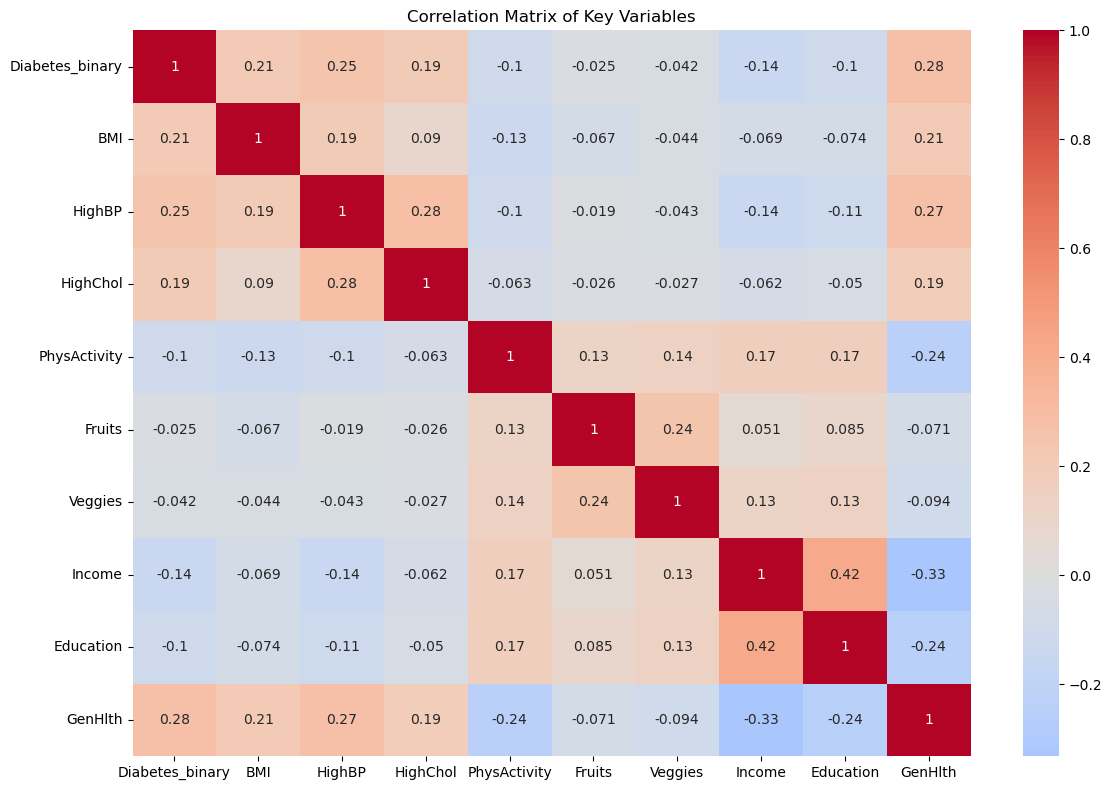

In [401]:
# Initial correlation analysis
plt.figure(figsize=(12, 8))
correlation_vars = ['Diabetes_binary', 'BMI', 'HighBP', 'HighChol', 'PhysActivity', 
                   'Fruits', 'Veggies', 'Income', 'Education', 'GenHlth']
correlation_matrix = df[correlation_vars].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Key Variables')
plt.tight_layout()
plt.show()

## 5. Finding 1: Physical Health Indicators
Analyze BMI, Blood Pressure, and Cholesterol relationships with diabetes

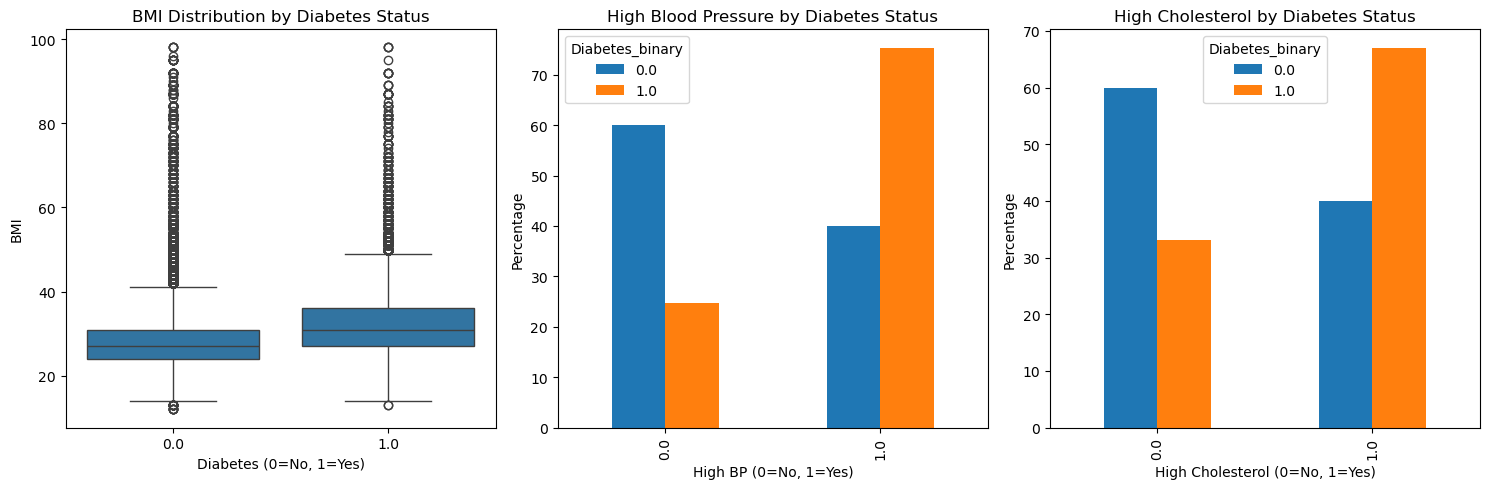

In [405]:
# Clear any existing plots
plt.clf()
plt.close('all')

# Create a new figure with specific size
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# BMI Analysis
sns.boxplot(x='Diabetes_binary', y='BMI', data=df, ax=axes[0])
axes[0].set_title('BMI Distribution by Diabetes Status')
axes[0].set_xlabel('Diabetes (0=No, 1=Yes)')
axes[0].set_ylabel('BMI')

# Blood Pressure Analysis
bp_diabetes = pd.crosstab(df['HighBP'], df['Diabetes_binary'], normalize='columns') * 100
bp_diabetes.plot(kind='bar', ax=axes[1])
axes[1].set_title('High Blood Pressure by Diabetes Status')
axes[1].set_xlabel('High BP (0=No, 1=Yes)')
axes[1].set_ylabel('Percentage')

# Cholesterol Analysis
chol_diabetes = pd.crosstab(df['HighChol'], df['Diabetes_binary'], normalize='columns') * 100
chol_diabetes.plot(kind='bar', ax=axes[2])
axes[2].set_title('High Cholesterol by Diabetes Status')
axes[2].set_xlabel('High Cholesterol (0=No, 1=Yes)')
axes[2].set_ylabel('Percentage')

# Adjust layout and display
plt.tight_layout()
plt.show()

In [409]:
# Statistical Analysis for Finding 1
X_physical = df[['BMI', 'HighBP', 'HighChol']]
y = df['Diabetes_binary']
X_physical = sm.add_constant(X_physical)
model_physical = sm.Logit(y, X_physical).fit()
print("\nPhysical Health Indicators Statistical Analysis:")
print(model_physical.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.374809
         Iterations 7

Physical Health Indicators Statistical Analysis:
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.6051      0.028   -164.619      0.000      -4.660      -4.550
BMI            0.0591      0.001     71.634      0.000       0.057       0.061
HighBP         1.1956      0.014     86.454      0.000       1.168       1.223
HighChol       0.7966      0.013     61.215      0.000       0.771       0.822


## 6. Finding 2: Lifestyle Behaviors
Analyze physical activity, diet, and health behaviors

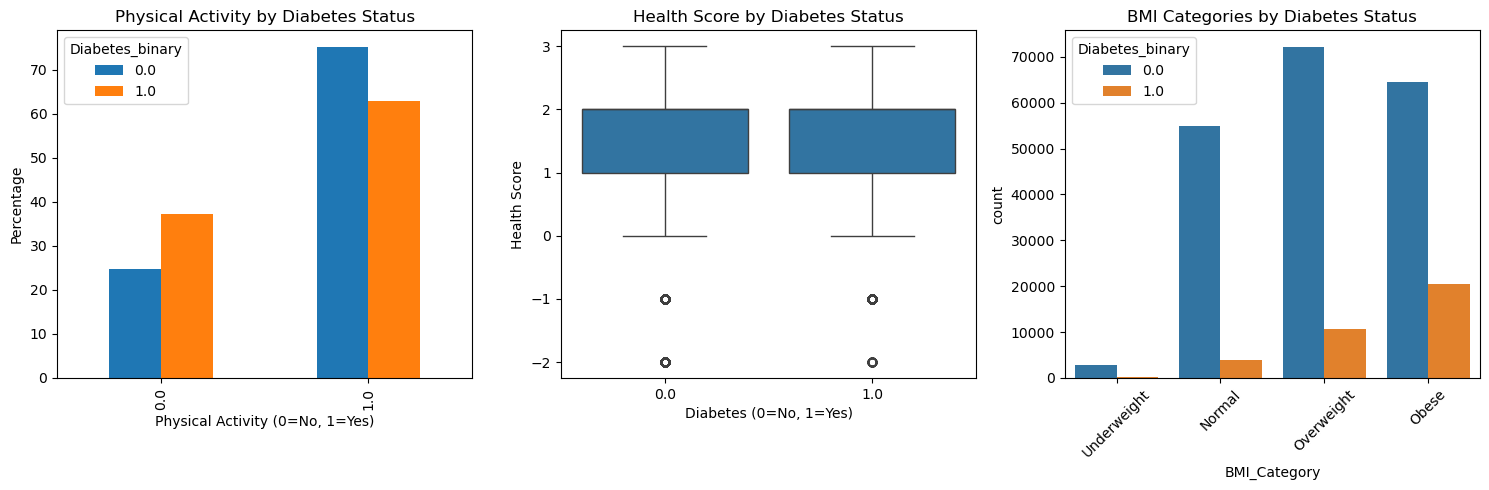

In [406]:
# For Finding 2: Lifestyle Behaviors
# Clear any existing plots
plt.clf()
plt.close('all')

# Create figure and subplots for Lifestyle Behaviors
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Physical Activity Analysis
activity_diabetes = pd.crosstab(df['PhysActivity'], df['Diabetes_binary'], normalize='columns') * 100
activity_diabetes.plot(kind='bar', ax=axes[0])
axes[0].set_title('Physical Activity by Diabetes Status')
axes[0].set_xlabel('Physical Activity (0=No, 1=Yes)')
axes[0].set_ylabel('Percentage')

# Health Score Analysis
sns.boxplot(x='Diabetes_binary', y='Health_Score', data=df, ax=axes[1])
axes[1].set_title('Health Score by Diabetes Status')
axes[1].set_xlabel('Diabetes (0=No, 1=Yes)')
axes[1].set_ylabel('Health Score')

# BMI Categories
sns.countplot(data=df, x='BMI_Category', hue='Diabetes_binary', ax=axes[2])
axes[2].set_title('BMI Categories by Diabetes Status')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

In [410]:
# Statistical Analysis for Finding 2
X_behaviors = df[['PhysActivity', 'Fruits', 'Veggies', 'Smoker', 'HvyAlcoholConsump']]
X_behaviors = sm.add_constant(X_behaviors)
model_behaviors = sm.Logit(y, X_behaviors).fit()
print("\nHealth Behaviors Statistical Analysis:")
print(model_behaviors.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.419067
         Iterations 7

Health Behaviors Statistical Analysis:
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2698      0.016    -80.526      0.000      -1.301      -1.239
PhysActivity         -0.5324      0.012    -42.633      0.000      -0.557      -0.508
Fruits               -0.0366      0.012     -2.952      0.003      -0.061      -0.012
Veggies              -0.1639      0.014    -11.443      0.000      -0.192      -0.136
Smoker                0.2538      0.012     21.566      0.000       0.231       0.277
HvyAlcoholConsump    -1.1210      0.036    -30.766      0.000      -1.192      -1.050


## 7. Finding 3: Socioeconomic Factors
Analyze income, education, and general health relationships

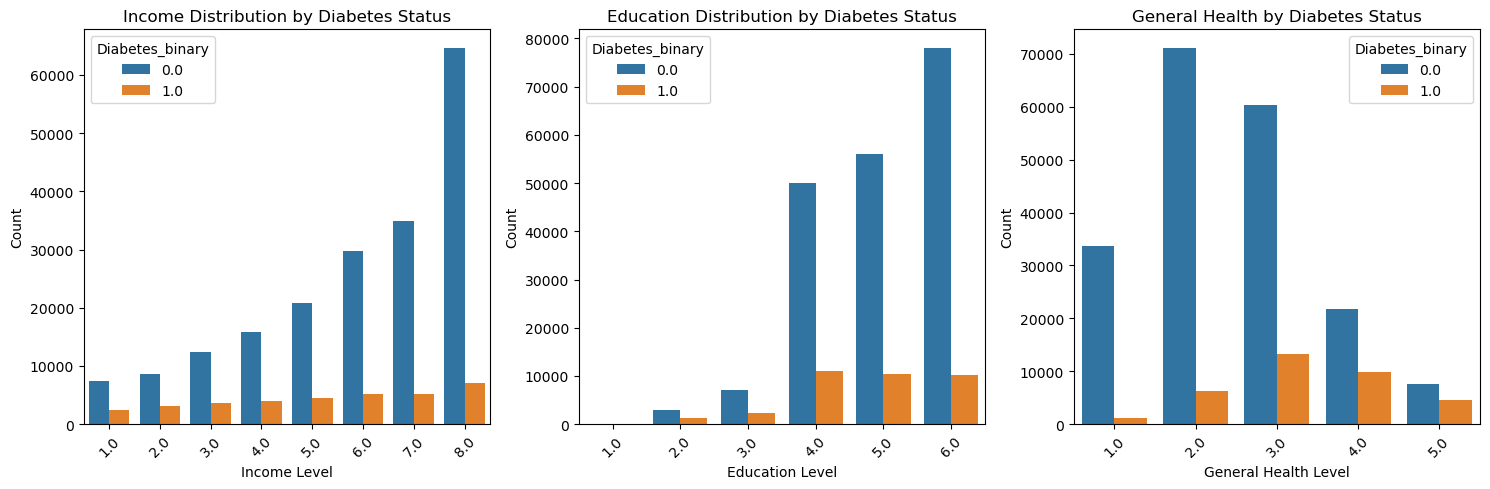

In [408]:
# For Finding 3: Socioeconomic Factors
# Clear any existing plots
plt.clf()
plt.close('all')

# Create figure and subplots for Socioeconomic Factors
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Income Analysis
sns.countplot(data=df, x='Income', hue='Diabetes_binary', ax=axes[0])
axes[0].set_title('Income Distribution by Diabetes Status')
axes[0].set_xlabel('Income Level')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].set_ylabel('Count')

# Education Analysis
sns.countplot(data=df, x='Education', hue='Diabetes_binary', ax=axes[1])
axes[1].set_title('Education Distribution by Diabetes Status')
axes[1].set_xlabel('Education Level')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].set_ylabel('Count')

# General Health Analysis
sns.countplot(data=df, x='GenHlth', hue='Diabetes_binary', ax=axes[2])
axes[2].set_title('General Health by Diabetes Status')
axes[2].set_xlabel('General Health Level')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [412]:
# Statistical Analysis for Finding 3
X_socio = df[['Income', 'Education', 'GenHlth']]
X_socio = sm.add_constant(X_socio)
model_socio = sm.Logit(y, X_socio).fit()
print("\nSocioeconomic Factors Statistical Analysis:")
print(model_socio.summary().tables[1])



Optimization terminated successfully.
         Current function value: 0.388843
         Iterations 6

Socioeconomic Factors Statistical Analysis:
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0978      0.040    -78.083      0.000      -3.176      -3.020
Income        -0.0506      0.003    -16.180      0.000      -0.057      -0.045
Education     -0.0556      0.006     -8.599      0.000      -0.068      -0.043
GenHlth        0.6756      0.006    109.705      0.000       0.664       0.688


## 8. Summary Statistics and Key Findings

In [413]:
# Summary Statistics and Key Findings
print("\nKey Findings Summary:")
print("-" * 50)
# Physical Health Summary
print("\n1. Physical Health Indicators:")
print(f"Average BMI (No Diabetes): {df[df['Diabetes_binary']==0]['BMI'].mean():.2f}")
print(f"Average BMI (Diabetes): {df[df['Diabetes_binary']==1]['BMI'].mean():.2f}")
print("\nHigh Blood Pressure Rates by Diabetes Status (%):")
print(pd.crosstab(df['HighBP'], df['Diabetes_binary'], normalize='columns') * 100)

# Lifestyle Behaviors Summary
print("\n2. Lifestyle Behaviors:")
print("\nPhysical Activity Rates by Diabetes Status (%):")
print(pd.crosstab(df['PhysActivity'], df['Diabetes_binary'], normalize='columns') * 100)
print("\nAverage Health Score by Diabetes Status:")
print(df.groupby('Diabetes_binary')['Health_Score'].mean())

# Socioeconomic Summary
print("\n3. Socioeconomic Factors:")
print("\nEducation Level Distribution by Diabetes Status (%):")
print(pd.crosstab(df['Education'], df['Diabetes_binary'], normalize='columns') * 100)
print("\nIncome Level Distribution by Diabetes Status (%):")
print(pd.crosstab(df['Income'], df['Diabetes_binary'], normalize='columns') * 100)


Key Findings Summary:
--------------------------------------------------

1. Physical Health Indicators:
Average BMI (No Diabetes): 28.10
Average BMI (Diabetes): 31.96

High Blood Pressure Rates by Diabetes Status (%):
Diabetes_binary        0.0        1.0
HighBP                               
0.0              59.946393  24.765649
1.0              40.053607  75.234351

2. Lifestyle Behaviors:

Physical Activity Rates by Diabetes Status (%):
Diabetes_binary        0.0        1.0
PhysActivity                         
0.0              24.808491  37.148474
1.0              75.191509  62.851526

Average Health Score by Diabetes Status:
Diabetes_binary
0.0    1.647834
1.0    1.424737
Name: Health_Score, dtype: float64

3. Socioeconomic Factors:

Education Level Distribution by Diabetes Status (%):
Diabetes_binary        0.0        1.0
Education                            
1.0               0.065337   0.133915
2.0               1.469824   3.370658
3.0               3.689222   6.541870
4.0   